In [4]:
import rasterio

C:\Users\sparc\AppData\Local\Temp\ipykernel_17076\3084517531.py:16: RuntimeWarning: invalid value encountered in divide
  ndci = (red - nir) / (red + nir)


Cloud mask saved at: E:\Land intelligence system\Koraput_CloudMask.tif


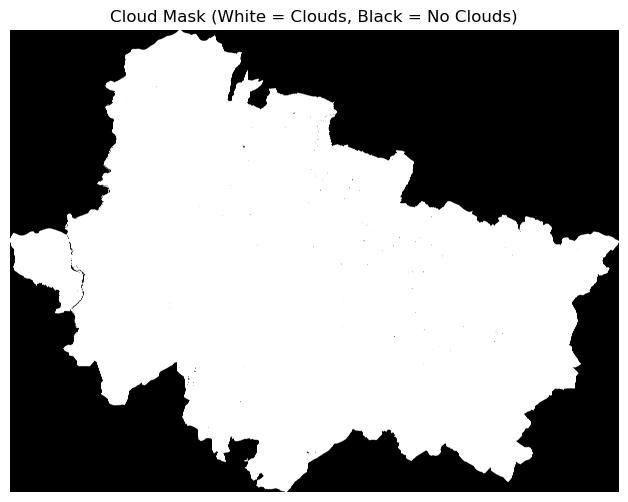

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load PlanetScope image
file_path = r"E:\Land intelligence system\Koraput_PS-24102024.tif"
output_path = r"E:\Land intelligence system\Koraput_CloudMask.tif"

with rasterio.open(file_path) as src:
    blue = src.read(1)  # Assuming Band 1 is Blue
    red = src.read(3)   # Assuming Band 3 is Red
    nir = src.read(4)   # Assuming Band 4 is NIR
    profile = src.profile  # Get metadata

# Compute NDCI
ndci = (red - nir) / (red + nir)

# Apply threshold to detect clouds
cloud_mask = (ndci > 0.3).astype(np.uint8)  # Convert to 0-1 binary mask

# Update metadata for saving (single band, byte format)
profile.update(
    dtype=rasterio.uint8,
    count=1,  # One band
    compress='lzw'  # Compression to reduce file size
)

# Save Cloud Mask as GeoTIFF
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(cloud_mask, 1)

print(f"Cloud mask saved at: {output_path}")

# Display Cloud Mask
plt.figure(figsize=(10, 6))
plt.imshow(cloud_mask, cmap='gray')
plt.title("Cloud Mask (White = Clouds, Black = No Clouds)")
plt.axis("off")
plt.show()


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the PlanetScope image
file_path = r"E:\Land intelligence system\Koraput_PS-24102024.tif"

with rasterio.open(file_path) as src:
    red = src.read(3).astype(np.float32)   # Red Band (B3)
    nir = src.read(4).astype(np.float32)   # NIR Band (B4)
    rgb = np.stack([src.read(3), src.read(2), src.read(1)], axis=-1)  # Create RGB image

# Compute NDCI (Cloud Index)
ndci_denominator = red + nir
ndci_denominator[ndci_denominator == 0] = 1  # Avoid division by zero
ndci = (red - nir) / ndci_denominator

# Apply threshold to create cloud mask
cloud_mask = (ndci > 0.3).astype(np.uint8)

# Plot RGB Image
plt.figure(figsize=(10, 6))
plt.imshow(rgb)
plt.title("Original PlanetScope Image")
plt.axis("off")
plt.show()

# Plot Cloud Mask
plt.figure(figsize=(10, 6))
plt.imshow(cloud_mask, cmap='gray')
plt.title("Cloud Mask (White = Clouds, Black = No Clouds)")
plt.axis("off")
plt.show()


In [1]:
import geopandas as gpd
crop_samps = gpd.read_file(r"E:\Land intelligence system\Laxmi Kanta\Koraput_Boipariguda_sample_crops_sign\Boipariguda_Crops_v1.shp")

C:\Users\sparc\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:196: RuntimeWarning: E:\Land intelligence system\Laxmi Kanta\Koraput_Boipariguda_sample_crops_sign\Boipariguda_Crops_v1.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [2]:
crop_samps.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 45697 entries, 0 to 45696
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          45697 non-null  int64   
 1   PLOT_CODE1  45697 non-null  object  
 2   MPLOT_NO    45697 non-null  object  
 3   VILL_CODE   45697 non-null  object  
 4   VILL_NAME   45697 non-null  object  
 5   KHATA_NO    20092 non-null  object  
 6   PLOT_NO     20092 non-null  object  
 7   TAHASIL_CD  45697 non-null  object  
 8   TAHASIL     45697 non-null  object  
 9   TOT_AREA    20092 non-null  float64 
 10  RSGIS_DSN   20092 non-null  object  
 11  LU_CLASS    43851 non-null  object  
 12  LAND_USE    1013 non-null   object  
 13  PADDY       18854 non-null  object  
 14  CROP_NAME   45697 non-null  object  
 15  SURV_DT     45697 non-null  object  
 16  geometry    45697 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(14)
memory usage: 5.9+ MB


In [39]:
crop_samps.head(3)

,ID,PLOT_CODE1,MPLOT_NO,VILL_CODE,VILL_NAME,KHATA_NO,PLOT_NO,TAHASIL_CD,TAHASIL,TOT_AREA,RSGIS_DSN,LU_CLASS,LAND_USE,PADDY,CROP_NAME,SURV_DT,geometry
0,29210,0812008-1,1,0812008,Tala,73,1,0812,Boipariguda,0.766,Y,Agriculture,None,Y,Rice,0000/00/00,"POLYGON ((82.48427 18.75243, 82.48426 18.7524,..."
1,29211,0812008-2,2,0812008,Tala,73,2,0812,Boipariguda,1.018,Y,Agriculture,None,Y,Rice,0000/00/00,"POLYGON ((82.48602 18.75259, 82.48596 18.7526,..."
2,29214,0812008-5,5,0812008,Tala,73,5,0812,Boipariguda,0.178,Y,Agriculture,None,Y,Rice,0000/00/00,"POLYGON ((82.48591 18.75183, 82.48598 18.75181..."


In [40]:
null_survey_plots = crop_samps[crop_samps["SURV_DT"].isnull()]["PLOT_CODE1"].nunique()

print(f"Number of unique plots (PLOT_NO) with null SURV_DT: {null_survey_plots}")

Number of unique plots (PLOT_NO) with null SURV_DT: 0


In [41]:
null_survey_plots = crop_samps[crop_samps["SURV_DT"].isnull()]
null_survey_plots

,ID,PLOT_CODE1,MPLOT_NO,VILL_CODE,VILL_NAME,KHATA_NO,PLOT_NO,TAHASIL_CD,TAHASIL,TOT_AREA,RSGIS_DSN,LU_CLASS,LAND_USE,PADDY,CROP_NAME,SURV_DT,geometry


In [3]:
surv_dt = crop_samps[["SURV_DT","PLOT_CODE1"]]
surv_dt.head(20)

,SURV_DT,PLOT_CODE1
0,0000/00/00,0812008-1
1,0000/00/00,0812008-2
2,0000/00/00,0812008-5
3,0000/00/00,0812008-6
4,0000/00/00,0812008-9
5,2024/09/14,0812008-19
6,2024/09/14,0812008-20
7,2024/09/14,0812008-21
8,2024/09/14,0812008-25
9,2024/09/14,0812008-26


In [6]:
crop_samps.columns

Index(['ID', 'PLOT_CODE1', 'MPLOT_NO', 'VILL_CODE', 'VILL_NAME', 'KHATA_NO',
       'PLOT_NO', 'TAHASIL_CD', 'TAHASIL', 'TOT_AREA', 'RSGIS_DSN', 'LU_CLASS',
       'LAND_USE', 'PADDY', 'CROP_NAME', 'SURV_DT', 'geometry'],
      dtype='object')

In [7]:
total_plots = len(crop_samps)

missing_survey_count = (crop_samps["SURV_DT"] == "0000/00/00").sum()

print(f"{missing_survey_count} plots are missing SURV_DT out of {total_plots} plots.")

5413 plots are missing SURV_DT out of 45697 plots.


In [8]:
missing_survey_count

5413

In [9]:
# Filter plots where SURV_DT is missing
missing_survey_plots = crop_samps[crop_samps["SURV_DT"] == "0000/00/00"]

# Count unique crops and their occurrences in missing survey plots
missing_crop_counts = missing_survey_plots["CROP_NAME"].value_counts()

# Print result
print("Unique crops and their total count in missing SURV_DT plots:\n")
print(missing_crop_counts)


Unique crops and their total count in missing SURV_DT plots:

CROP_NAME
Rice          5385
Eucalyptus      18
Acacia           2
Jackfruit        2
Mango            2
Bamboo           1
Coconut          1
Cashew           1
Mahua            1
Name: count, dtype: int64


In [10]:
total_crop_counts = crop_samps["CROP_NAME"].value_counts()

# Print result
print("Unique crops and their total count in total SURV_DT plots:\n")
print(total_crop_counts)
print(len(total_crop_counts))

Unique crops and their total count in total SURV_DT plots:

CROP_NAME
Rice                                        27341
Eucalyptus                                   5550
Cashew                                       3531
Maize                                        3262
Finger Millet                                2616
                                            ...  
Shisham                                         3
Pointed Gourd                                   3
Ambrette Seed; Muskmallow                       2
Makhana; Prickly Waterlily                      2
Khasi Kateri; Yellow- Barried Nightshade        1
Name: count, Length: 67, dtype: int64
67


In [4]:
total_crop_dict = crop_samps["CROP_NAME"].value_counts().to_dict()

# Print dictionary
print(total_crop_dict)

{'Rice': 27341, 'Eucalyptus': 5550, 'Cashew': 3531, 'Maize': 3262, 'Finger Millet': 2616, 'Little Millet': 993, 'Mango': 772, 'Teak': 152, 'Chilli': 102, 'Brinjal': 93, 'Banana': 91, 'Acacia': 83, 'Okra': 82, 'Bamboo': 78, 'Sweet Potato': 75, 'Tamarind': 70, 'Nigerseed': 61, 'Yam Bean': 55, 'Groundnut': 50, 'Foxtail Millet': 43, 'Cowpea': 38, 'Poppy': 35, 'Ajwain': 33, 'Cauliflower': 32, 'Pearl Millet': 31, 'Bitter Gourd': 25, 'Ginger': 21, 'Jackfruit': 20, 'Sal Tree': 20, 'Pumpkin': 20, 'Guava': 20, 'Jute': 19, 'Cabbage': 18, 'Tomato': 18, 'Coconut': 17, 'Sugarcane': 16, 'Black Berry': 15, 'Ridge Gourd': 14, 'Turmeric': 13, 'Vegetable Amaranth': 13, 'Linseed': 12, 'Mahua': 12, 'Sunflower': 12, 'Barnyard Millet': 11, 'Grapes': 8, 'Sorghum': 8, 'Cucumber': 8, 'Marigold': 8, 'Potato': 7, 'Falsa': 7, 'Papaya': 6, 'Nigella': 6, 'Anise': 6, 'French bean': 6, 'Casurina': 5, 'Custard Apple': 4, 'Canna': 4, 'Black Pepper': 4, 'Kodo Millet': 4, 'Almond': 4, 'Bottle Gourd': 3, 'Rose': 3, 'Shisha

In [5]:
# Select all rows where CROP_NAME contains "Millet"
millet_crops = crop_samps[crop_samps["CROP_NAME"].str.contains("Millet", case=False, na=False)]

# Display result
print(len(millet_crops))


3698


In [6]:
millet_crop_dict = millet_crops["CROP_NAME"].value_counts().to_dict()

# Print dictionary
print(millet_crop_dict)

{'Finger Millet': 2616, 'Little Millet': 993, 'Foxtail Millet': 43, 'Pearl Millet': 31, 'Barnyard Millet': 11, 'Kodo Millet': 4}


In [7]:
millet_names = millet_crops["CROP_NAME"].unique().tolist()

# Print the list
print(millet_names)

['Finger Millet', 'Little Millet', 'Barnyard Millet', 'Pearl Millet', 'Foxtail Millet', 'Kodo Millet']


In [8]:
# Replace all millet varieties with "Millets"
crop_samps.loc[crop_samps["CROP_NAME"].isin(millet_names), "CROP_NAME"] = "Millets"


In [9]:
total_crop_dict_v1 = crop_samps["CROP_NAME"].value_counts().to_dict()

# Print dictionary
print(total_crop_dict_v1)
print(len(total_crop_dict_v1))

{'Rice': 27341, 'Eucalyptus': 5550, 'Millets': 3698, 'Cashew': 3531, 'Maize': 3262, 'Mango': 772, 'Teak': 152, 'Chilli': 102, 'Brinjal': 93, 'Banana': 91, 'Acacia': 83, 'Okra': 82, 'Bamboo': 78, 'Sweet Potato': 75, 'Tamarind': 70, 'Nigerseed': 61, 'Yam Bean': 55, 'Groundnut': 50, 'Cowpea': 38, 'Poppy': 35, 'Ajwain': 33, 'Cauliflower': 32, 'Bitter Gourd': 25, 'Ginger': 21, 'Sal Tree': 20, 'Jackfruit': 20, 'Pumpkin': 20, 'Guava': 20, 'Jute': 19, 'Tomato': 18, 'Cabbage': 18, 'Coconut': 17, 'Sugarcane': 16, 'Black Berry': 15, 'Ridge Gourd': 14, 'Vegetable Amaranth': 13, 'Turmeric': 13, 'Mahua': 12, 'Linseed': 12, 'Sunflower': 12, 'Marigold': 8, 'Sorghum': 8, 'Grapes': 8, 'Cucumber': 8, 'Potato': 7, 'Falsa': 7, 'Papaya': 6, 'French bean': 6, 'Nigella': 6, 'Anise': 6, 'Casurina': 5, 'Canna': 4, 'Black Pepper': 4, 'Custard Apple': 4, 'Almond': 4, 'Pointed Gourd': 3, 'Bottle Gourd': 3, 'Shisham': 3, 'Rose': 3, 'Ambrette Seed; Muskmallow': 2, 'Makhana; Prickly Waterlily': 2, 'Khasi Kateri; Yell

In [10]:
# Sort dictionary in decreasing order (high to low)
sorted_crop_dict_desc = dict(sorted(total_crop_dict_v1.items(), key=lambda x: x[1], reverse=True))

# # Sort dictionary in increasing order (low to high)
# sorted_crop_dict_asc = dict(sorted(total_crop_dict_v1.items(), key=lambda x: x[1]))

# Print results
print("Sorted (High to Low):", sorted_crop_dict_desc)
# print("Sorted (Low to High):", sorted_crop_dict_asc)


Sorted (High to Low): {'Rice': 27341, 'Eucalyptus': 5550, 'Millets': 3698, 'Cashew': 3531, 'Maize': 3262, 'Mango': 772, 'Teak': 152, 'Chilli': 102, 'Brinjal': 93, 'Banana': 91, 'Acacia': 83, 'Okra': 82, 'Bamboo': 78, 'Sweet Potato': 75, 'Tamarind': 70, 'Nigerseed': 61, 'Yam Bean': 55, 'Groundnut': 50, 'Cowpea': 38, 'Poppy': 35, 'Ajwain': 33, 'Cauliflower': 32, 'Bitter Gourd': 25, 'Ginger': 21, 'Sal Tree': 20, 'Jackfruit': 20, 'Pumpkin': 20, 'Guava': 20, 'Jute': 19, 'Tomato': 18, 'Cabbage': 18, 'Coconut': 17, 'Sugarcane': 16, 'Black Berry': 15, 'Ridge Gourd': 14, 'Vegetable Amaranth': 13, 'Turmeric': 13, 'Mahua': 12, 'Linseed': 12, 'Sunflower': 12, 'Marigold': 8, 'Sorghum': 8, 'Grapes': 8, 'Cucumber': 8, 'Potato': 7, 'Falsa': 7, 'Papaya': 6, 'French bean': 6, 'Nigella': 6, 'Anise': 6, 'Casurina': 5, 'Canna': 4, 'Black Pepper': 4, 'Custard Apple': 4, 'Almond': 4, 'Pointed Gourd': 3, 'Bottle Gourd': 3, 'Shisham': 3, 'Rose': 3, 'Ambrette Seed; Muskmallow': 2, 'Makhana; Prickly Waterlily': 

In [ ]:
crop_samps_october = crop_samps[crop_samps["SURV_DT"].str.contains(r"/10/")]
len(crop_samps_october)

In [11]:
import pandas as pd

# # Sample DataFrame
# crop_samps = pd.DataFrame({
#     "SURV_DT": ["2024/09/14", "2024/10/01", "0000/00/00", "2024/11/05", "InvalidDate", "", "2024/09/22"],
#     "CROP_NAME": ["Rice", "Maize", "Rice", "Millets", "Maize", "Rice", "Cashew"],
#     "PLOT_CODE1": ["0812008-26", "0812008-27", "0812008-28", "0812008-29", "0812008-34", "0812008-35", "0812008-36"]
# })

# Replace invalid dates with NaN (optional)
crop_samps.loc[crop_samps["SURV_DT"].str.contains(r"0000/00/00|Invalid|^\s*$", na=False, regex=True), "SURV_DT"] = None

# Convert "SURV_DT" to DateTime format, handling errors
crop_samps["SURV_DT"] = pd.to_datetime(crop_samps["SURV_DT"], format="%Y/%m/%d", errors="coerce")

# Drop rows where conversion failed
crop_samps = crop_samps.dropna(subset=["SURV_DT"])

# Extract Month and Year
crop_samps["Year"] = crop_samps["SURV_DT"].dt.year
crop_samps["Month"] = crop_samps["SURV_DT"].dt.month

# Print the cleaned data
print(crop_samps[["SURV_DT", "Year", "Month", "CROP_NAME"]])


         SURV_DT  Year  Month CROP_NAME
5     2024-09-14  2024      9   Millets
6     2024-09-14  2024      9      Rice
7     2024-09-14  2024      9      Rice
8     2024-09-14  2024      9      Rice
9     2024-09-14  2024      9      Rice
...          ...   ...    ...       ...
45692 2024-10-09  2024     10    Tomato
45693 2024-10-10  2024     10   Millets
45694 2024-10-10  2024     10    Chilli
45695 2024-10-09  2024     10    Chilli
45696 2024-10-09  2024     10     Maize

[40284 rows x 4 columns]


In [12]:
crop_samps.columns

Index(['ID', 'PLOT_CODE1', 'MPLOT_NO', 'VILL_CODE', 'VILL_NAME', 'KHATA_NO',
       'PLOT_NO', 'TAHASIL_CD', 'TAHASIL', 'TOT_AREA', 'RSGIS_DSN', 'LU_CLASS',
       'LAND_USE', 'PADDY', 'CROP_NAME', 'SURV_DT', 'geometry', 'Year',
       'Month'],
      dtype='object')

In [16]:
crop_samps.to_csv(r"E:\Land intelligence system\Koraput_Boipariguda\Boipariguda_Monthly_survey_crop_data.csv", index=False)


In [14]:
# Filter dataset for October (Month = 10)
oct_crops = crop_samps[crop_samps["Month"] == 10]

# Get unique crop names in October
unique_oct_crops = oct_crops["CROP_NAME"].unique()

# Print total count and the unique crop names
print(f"Total unique crops in October: {len(unique_oct_crops)}")
print("List of unique crops in October:")
print(unique_oct_crops)


Total unique crops in October: 26
List of unique crops in October:
['Rice' 'Maize' 'Eucalyptus' 'Millets' 'Mango' 'Bamboo' 'Tamarind'
 'Banana' 'Cashew' 'Sunflower' 'Tomato' 'Mahua' 'Chilli' 'Black Pepper'
 'Canna' 'Pointed Gourd' 'Okra' 'Cowpea' 'Sugarcane' 'Bitter Gourd'
 'Guava' 'Cabbage' 'Teak' 'Black Berry' 'Nigerseed' 'Ridge Gourd']


In [15]:
# Count occurrences of each crop in October
oct_crops_count = oct_crops["CROP_NAME"].value_counts()

# Print crop counts
print("Crop counts in October:")
print(oct_crops_count)


Crop counts in October:
CROP_NAME
Rice             1124
Eucalyptus        244
Millets           204
Cashew            124
Maize              44
Mango              37
Cabbage            16
Chilli             12
Bamboo              6
Sunflower           5
Banana              4
Okra                4
Guava               3
Canna               3
Teak                3
Tomato              2
Mahua               2
Nigerseed           1
Black Berry         1
Black Pepper        1
Bitter Gourd        1
Sugarcane           1
Cowpea              1
Pointed Gourd       1
Tamarind            1
Ridge Gourd         1
Name: count, dtype: int64


In [21]:
# Define the crops to keep (from Rice to Mango)
selected_crops = ["Rice", "Eucalyptus", "Millets", "Cashew", "Maize", "Mango"]

# Filter dataset for October and the selected crops
oct_selected = crop_samps[(crop_samps["Month"] == 10) & (crop_samps["CROP_NAME"].isin(selected_crops))]

# Select top 300 Rice plots based on TOT_AREA
top_300_rice = oct_selected[oct_selected["CROP_NAME"] == "Rice"].nlargest(300, "TOT_AREA")

# Keep other selected crops as they are
other_crops = oct_selected[oct_selected["CROP_NAME"] != "Rice"]

# Combine the datasets
final_selected = pd.concat([top_300_rice, other_crops])

# Create new column 'selc_crop' with crop names
final_selected["selc_crop"] = final_selected["CROP_NAME"]

final_selected[["PLOT_CODE1", "CROP_NAME", "TOT_AREA", "selc_crop"]]

# Export if needed
# final_selected.to_csv("selected_crops_october.csv", index=False)


,PLOT_CODE1,CROP_NAME,TOT_AREA,selc_crop
21453,0812162-335,Rice,6.672,Rice
23777,0812183-13,Rice,6.548,Rice
21269,0812162-5,Rice,5.931,Rice
23816,0812183-12,Rice,5.090,Rice
22998,0812170-1789,Rice,4.702,Rice
...,...,...,...,...
45683,0812082-56,Millets,NaN,Millets
45686,0812082-60,Maize,NaN,Maize
45687,0812082-66,Maize,NaN,Maize
45693,0812082-85,Millets,NaN,Millets


In [22]:
# Get count of each selected crop
selc_crop_counts = final_selected["selc_crop"].value_counts()

# Print result
print(selc_crop_counts)


selc_crop
Rice          300
Eucalyptus    244
Millets       204
Cashew        124
Maize          44
Mango          37
Name: count, dtype: int64


In [26]:
final_selected.columns

Index(['ID', 'PLOT_CODE1', 'MPLOT_NO', 'VILL_CODE', 'VILL_NAME', 'KHATA_NO',
       'PLOT_NO', 'TAHASIL_CD', 'TAHASIL', 'TOT_AREA', 'RSGIS_DSN', 'LU_CLASS',
       'LAND_USE', 'PADDY', 'CROP_NAME', 'SURV_DT', 'geometry', 'Year',
       'Month', 'selc_crop'],
      dtype='object')

In [28]:
final_selected.shape

(953, 20)

In [29]:
final_selected.to_csv("E:\Land intelligence system\Koraput_Boipariguda\Boipariguda_oct_elected_crops.csv", index=False)

In [24]:
# Count null values in selc_crop
null_count = final_selected["selc_crop"].isna().sum()

# Print result
print(f"Number of null values in selc_crop: {null_count}")


Number of null values in selc_crop: 0


In [23]:
unique_crops_per_month = crop_samps.groupby("Month")["CROP_NAME"].nunique().reset_index(name="Unique_Crop_Count")

# Print the result
print(unique_crops_per_month)

   Month  Unique_Crop_Count
0      8                 60
1      9                 56
2     10                 26


In [26]:
# Convert to dictionary format
crop_counts_dict = crop_counts_per_month.groupby("Month").apply(lambda x: dict(zip(x["CROP_NAME"], x["Count"]))).to_dict()

# Print nicely
for month, crops in crop_counts_dict.items():
    print(f"Month {month}: {crops}\n")


Month 8: {'Acacia': 62, 'Ajwain': 24, 'Ambrette Seed; Muskmallow': 2, 'Anise': 5, 'Bamboo': 39, 'Banana': 53, 'Bitter Gourd': 14, 'Black Berry': 5, 'Black Pepper': 1, 'Bottle Gourd': 2, 'Brinjal': 68, 'Cabbage': 2, 'Canna': 1, 'Cashew': 2051, 'Casurina': 2, 'Cauliflower': 7, 'Chilli': 36, 'Coconut': 10, 'Cowpea': 14, 'Cucumber': 7, 'Custard Apple': 2, 'Eucalyptus': 2698, 'Falsa': 3, 'Ginger': 12, 'Grapes': 1, 'Groundnut': 7, 'Guava': 12, 'Jackfruit': 13, 'Jute': 9, 'Khasi Kateri; Yellow- Barried Nightshade': 1, 'Linseed': 12, 'Mahua': 7, 'Maize': 1789, 'Makhana; Prickly Waterlily': 1, 'Mango': 425, 'Marigold': 1, 'Millets': 1459, 'Nigella': 1, 'Nigerseed': 15, 'Okra': 68, 'Papaya': 4, 'Pointed Gourd': 2, 'Poppy': 34, 'Potato': 1, 'Pumpkin': 12, 'Rice': 11073, 'Ridge Gourd': 10, 'Rose': 2, 'Sal Tree': 10, 'Shisham': 1, 'Sorghum': 3, 'Sugarcane': 11, 'Sunflower': 2, 'Sweet Potato': 47, 'Tamarind': 31, 'Teak': 59, 'Tomato': 2, 'Turmeric': 6, 'Vegetable Amaranth': 1, 'Yam Bean': 26}

Month

In [64]:
unique_crops_per_month.columns

Index(['Month', 'Unique_Crop_Count'], dtype='object')

In [60]:
# Filter dataset for October (Month = 10)
oct_survey_plots = crop_samps[crop_samps["Month"] == 10]  # Ensure Month is numeric

# Count unique crops and their occurrences in October
oct_crop_counts = oct_survey_plots["CROP_NAME"].value_counts()

# Print result
print("Unique crops and their total count in October:\n")
print(oct_crop_counts)


Series([], Name: count, dtype: int64)
Unique crops and their total count in oct_survey_plots:

Series([], Name: count, dtype: int64)


In [ ]:
#crop repetation in months

In [28]:
# Count unique crops per month
crops_per_month = crop_samps.groupby("Month")["CROP_NAME"].unique()

# Find total unique crops across all months
unique_crops_overall = set(crop_samps["CROP_NAME"].unique())

# Find overlapping crops
crop_overlap = {}
for m1 in crops_per_month.keys():
    for m2 in crops_per_month.keys():
        if m1 != m2:
            common_crops = set(crops_per_month[m1]) & set(crops_per_month[m2])
            crop_overlap[f"{m1}-{m2}"] = len(common_crops)

# Print results
print(f"Total Unique Crops Across All Months: {len(unique_crops_overall)}\n")

for month, crops in crops_per_month.items():
    print(f"Month {month} - Unique Crops: {len(crops)}")

print("\nOverlap Between Months:")
for key, value in crop_overlap.items():
    print(f"{key}: {value} common crops")


Total Unique Crops Across All Months: 62

Month 8 - Unique Crops: 60
Month 9 - Unique Crops: 56
Month 10 - Unique Crops: 26

Overlap Between Months:
8-9: 54 common crops
8-10: 26 common crops
9-8: 54 common crops
9-10: 23 common crops
10-8: 26 common crops
10-9: 23 common crops


In [31]:
# Group by Month and PLOT_CODE, then get unique crops
crops_per_month_plot = crop_samps.groupby("Month")["PLOT_CODE1"].unique()

# Find total unique PLOT_CODEs across all months
unique_plots_overall = set(crop_samps["PLOT_CODE1"].unique())

# Find overlapping plots between months
plot_overlap = {}
months = list(crops_per_month_plot.keys())

for i in range(len(months)):
    for j in range(i + 1, len(months)):  # Avoid duplicate reverse comparisons
        m1, m2 = months[i], months[j]
        common_plots = set(crops_per_month_plot[m1]) & set(crops_per_month_plot[m2])
        plot_overlap[f"{m1}-{m2}"] = len(common_plots)

# Print results
print(f"Total Unique Plots Across All Months: {len(unique_plots_overall)}\n")

for month, plots in crops_per_month_plot.items():
    print(f"Month {month} - Unique Plots: {len(plots)}")

print("\nOverlap Between Months (Based on PLOT_CODE1):")
for key, value in plot_overlap.items():
    print(f"{key}: {value} common plots")


Total Unique Plots Across All Months: 40284

Month 8 - Unique Plots: 20278
Month 9 - Unique Plots: 18160
Month 10 - Unique Plots: 1846

Overlap Between Months (Based on PLOT_CODE1):
8-9: 0 common plots
8-10: 0 common plots
9-10: 0 common plots


In [55]:

# Group by Month and PLOT_CODE, then aggregate unique crops
crops_per_month_plot = crop_samps.groupby(["Month", "PLOT_CODE1"])["CROP_NAME"].unique()

crops_per_month_dict = crops_per_month_plot.groupby(level=0).apply(lambda x: x.to_dict()).to_dict()


# Find total unique PLOT_CODEs across all months
unique_plots_overall = set(crop_samps["PLOT_CODE1"].unique())

# Find overlapping plots between months
plot_overlap = {}
months = list(crops_per_month_dict.keys())

for i in range(len(months)):
    for j in range(i + 1, len(months)):  # Avoid duplicate reverse comparisons
        m1, m2 = months[i], months[j]

        # Get unique plot codes for both months
        plots_m1 = set(crops_per_month_dict[m1].keys())
        plots_m2 = set(crops_per_month_dict[m2].keys())

        # Find common plots
        common_plots = plots_m1 & plots_m2
        plot_overlap[f"{m1}-{m2}"] = len(common_plots)

# Print results
print(f"Total Unique Plots Across All Months: {len(unique_plots_overall)}\n")

for month, plots in crops_per_month_dict.items():
    print(f"Month {month} - Unique Plots: {len(plots)}")

print("\nOverlap Between Months (Based on PLOT_CODE1):")
for key, value in plot_overlap.items():
    print(f"{key}: {value} common plots")


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [32]:
# Count unique crops per month
crops_per_month = crop_samps.groupby("Month")["CROP_NAME"].unique()

# Find total unique crops across all months
unique_crops_overall = set(crop_samps["CROP_NAME"].unique())

# Find overlapping crops between months (Avoid redundant comparisons)
crop_overlap = {}
months = list(crops_per_month.keys())

for i in range(len(months)):
    for j in range(i + 1, len(months)):  # Ensures each pair is checked only once
        m1, m2 = months[i], months[j]
        common_crops = set(crops_per_month[m1]) & set(crops_per_month[m2])
        crop_overlap[f"{m1}-{m2}"] = len(common_crops)

# Print results
print(f"Total Unique Crops Across All Months: {len(unique_crops_overall)}\n")

for month, crops in crops_per_month.items():
    print(f"Month {month} - Unique Crops: {len(crops)}")

print("\nOverlap Between Months:")
for key, value in crop_overlap.items():
    print(f"{key}: {value} common crops")


Total Unique Crops Across All Months: 62

Month 8 - Unique Crops: 60
Month 9 - Unique Crops: 56
Month 10 - Unique Crops: 26

Overlap Between Months:
8-9: 54 common crops
8-10: 26 common crops
9-10: 23 common crops
